# Множественная линейная регрессия на чистых данных
## Цель работы
Познакомиться с основными приемами работы с множественными регрессионными моделями с использованием библиотеки sklearn.


## Содержание работы
1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).
2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.
3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.
4. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.
5. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

### 2. Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк. Выведите первые строки датасета.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import time

In [2]:
x = pd.read_csv("data/0_x.csv", header = None)
y = pd.read_csv("data/0_y.csv", header = None)

x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


### 3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [3]:
x.shape, y.shape

((387, 5), (387, 1))

In [4]:
for col in x.columns:
    print(f'parameter {col}')
    print(x[col].describe())
    print()

parameter 0
count    387.000000
mean       0.080231
std        1.006557
min       -2.721942
25%       -0.505726
50%        0.064065
75%        0.746176
max        3.077357
Name: 0, dtype: float64

parameter 1
count    387.000000
mean      -0.023369
std        1.008319
min       -3.526587
25%       -0.606748
50%       -0.006496
75%        0.602911
max        2.779463
Name: 1, dtype: float64

parameter 2
count    387.000000
mean      -0.094194
std        1.013547
min       -2.952847
25%       -0.731435
50%       -0.123261
75%        0.534841
max        2.959742
Name: 2, dtype: float64

parameter 3
count    387.000000
mean       0.052474
std        0.996496
min       -3.468134
25%       -0.594637
50%        0.022809
75%        0.750923
max        2.943178
Name: 3, dtype: float64

parameter 4
count    387.000000
mean       0.067604
std        0.964922
min       -2.376103
25%       -0.582224
50%       -0.027389
75%        0.665682
max        3.626974
Name: 4, dtype: float64



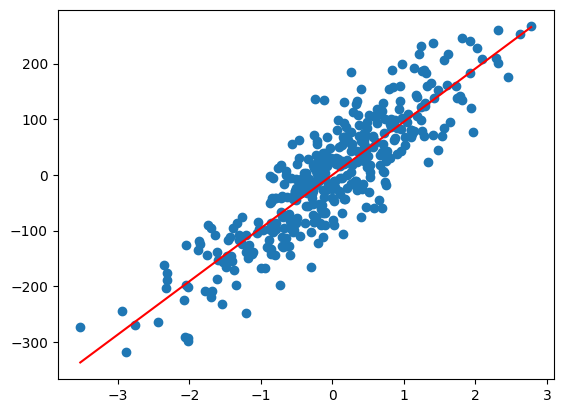

r2 score: 0.7699743283650629


In [5]:
binary = LinearRegression()
binary.fit(x[[1]], y)
y_pred = binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')
plt.show()

print(f'r2 score: {r2_score(y_pred=y_pred, y_true=y)}')

Множественная регрессия

In [6]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

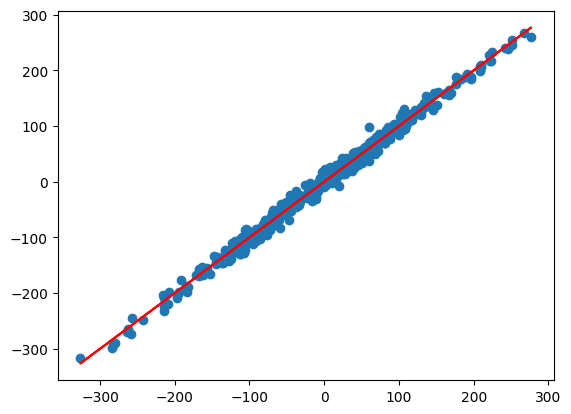

In [7]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### 4. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

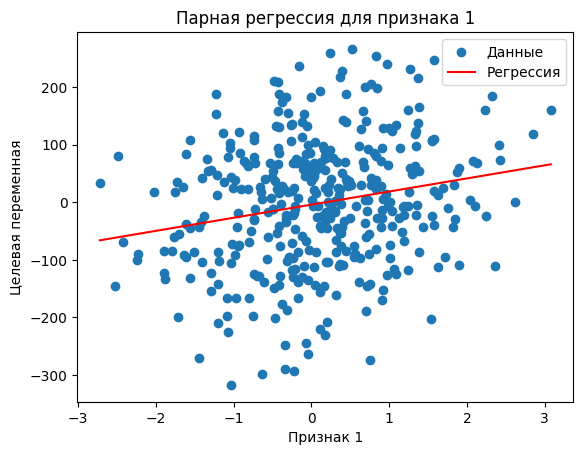

Коэффициент детерминации (R^2) для признака 1: 0.04364336234689348


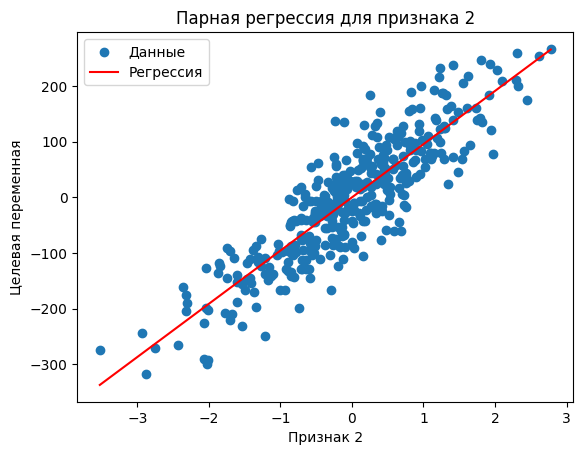

Коэффициент детерминации (R^2) для признака 2: 0.7699743283650629


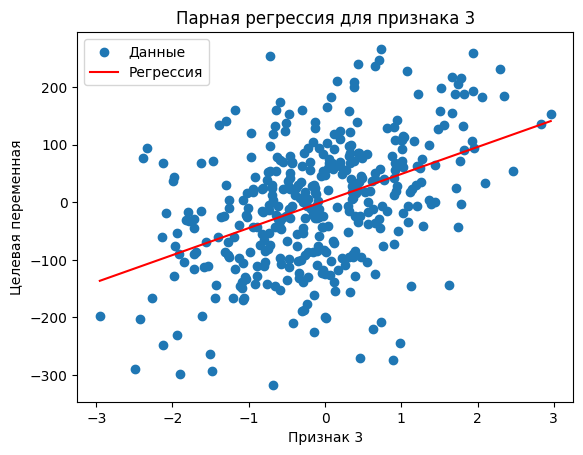

Коэффициент детерминации (R^2) для признака 3: 0.18794528514998887


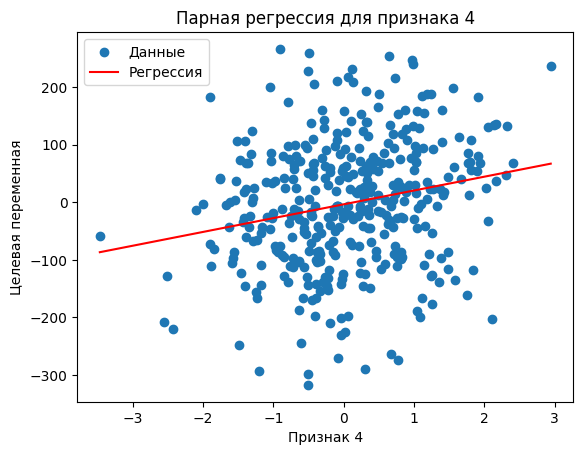

Коэффициент детерминации (R^2) для признака 4: 0.047470345664983093


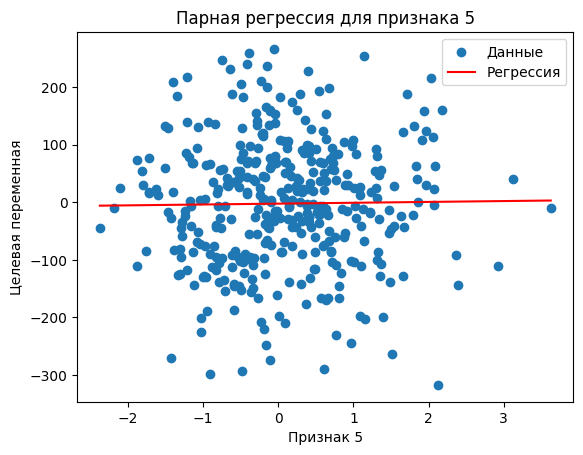

Коэффициент детерминации (R^2) для признака 5: 0.00017176151145947838


In [8]:
for i in range(x.shape[1]):
    model = LinearRegression()
    model.fit(x[[i]], y)

    plt.scatter(x[i], y,  label='Данные')
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, model.predict(xx), color='red', label='Регрессия')
    plt.title(f'Парная регрессия для признака {i+1}')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

    print(f"Коэффициент детерминации (R^2) для признака {i+1}: {model.score(x[[i]], y)}")

### 5. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.


In [9]:
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9921328127433378

Показатели довольно высокие, практически 99%, поэтому качество регрессии высокое

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

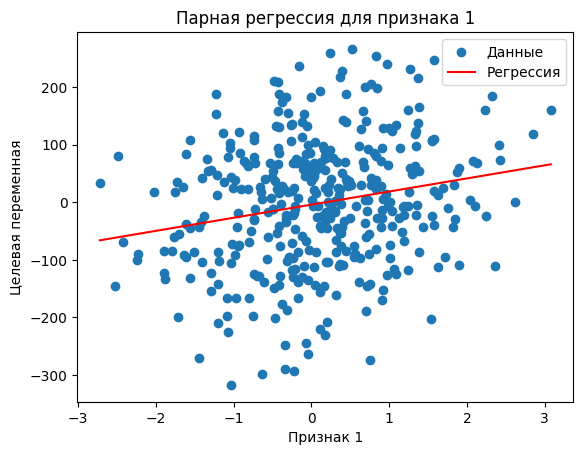

Коэффициент детерминации (R^2) для признака 1: 0.04364336234689348


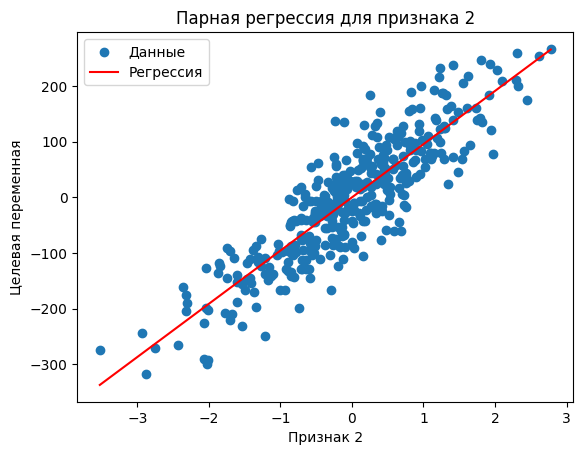

Коэффициент детерминации (R^2) для признака 2: 0.7699743283650629


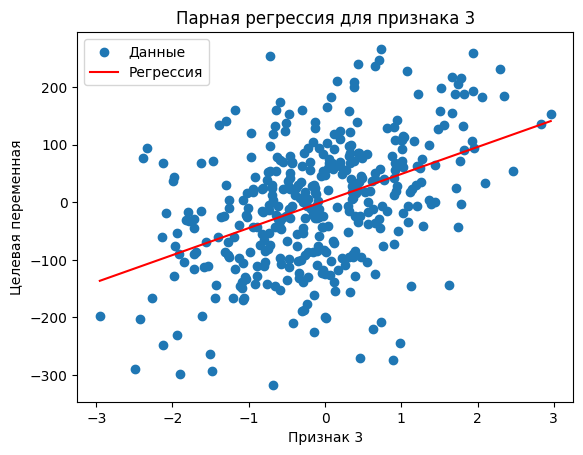

Коэффициент детерминации (R^2) для признака 3: 0.18794528514998887


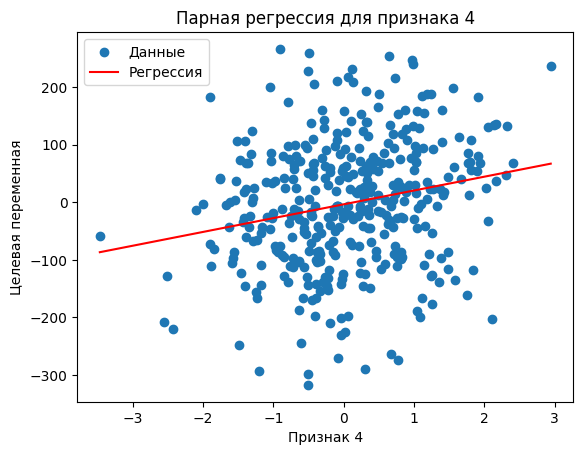

Коэффициент детерминации (R^2) для признака 4: 0.047470345664983093


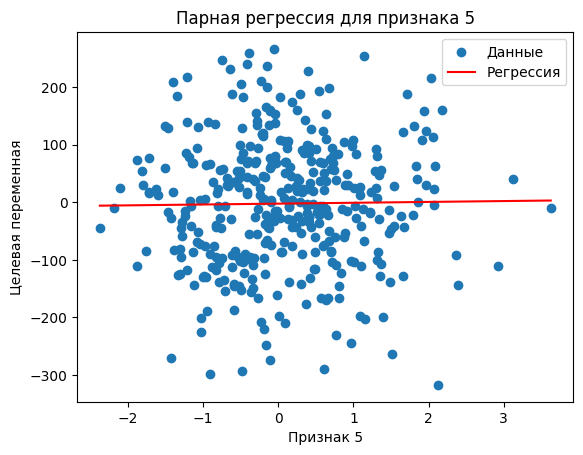

Коэффициент детерминации (R^2) для признака 5: 0.00017176151145947838


In [10]:
for i in range(x.shape[1]):
    model = LinearRegression()
    model.fit(x[[i]], y)

    plt.scatter(x[i], y,  label='Данные')
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, model.predict(xx), color='red', label='Регрессия')
    plt.title(f'Парная регрессия для признака {i+1}')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

    print(f"Коэффициент детерминации (R^2) для признака {i+1}: {model.score(x[[i]], y)}")

### 2. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

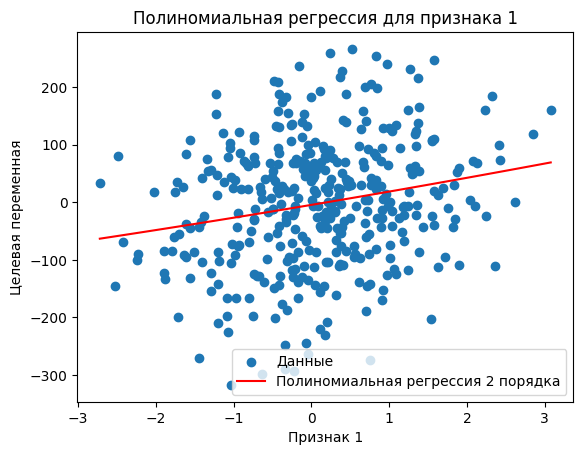

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 2 порядка: 0.04367170367915507


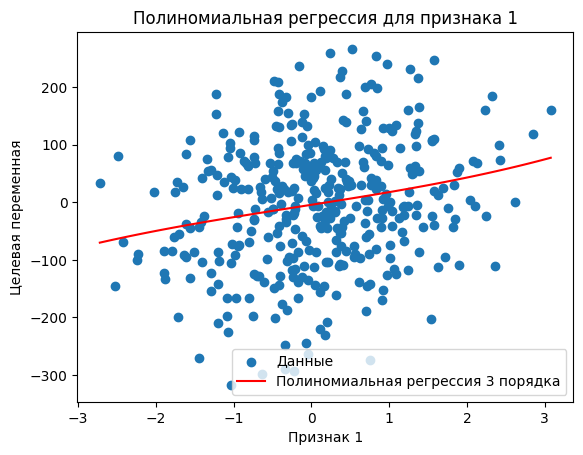

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 3 порядка: 0.04376506816920167


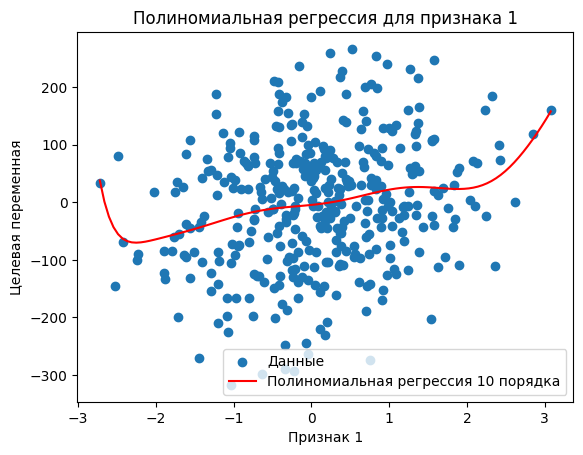

Коэффициент детерминации (R^2) для признака 1 и полиномиальной регрессии 10 порядка: 0.05035596325168745


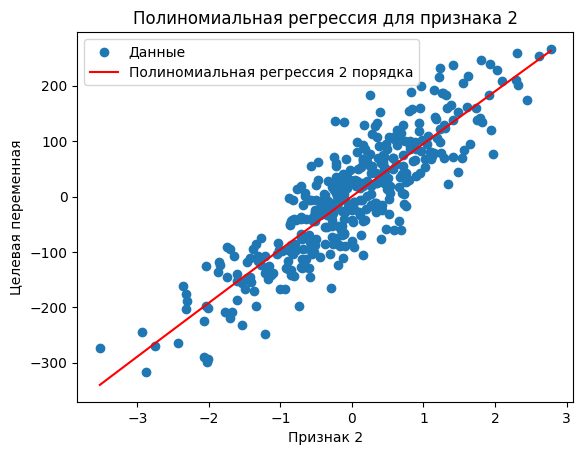

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 2 порядка: 0.7699942588883133


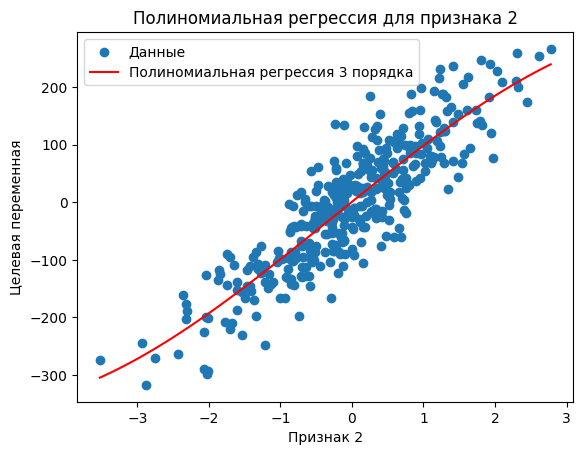

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 3 порядка: 0.7711184109235001


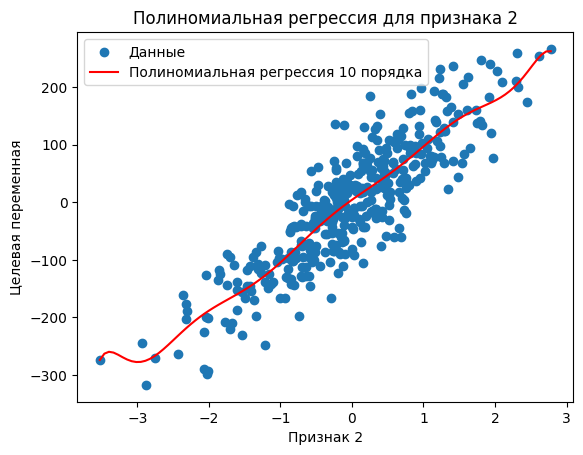

Коэффициент детерминации (R^2) для признака 2 и полиномиальной регрессии 10 порядка: 0.7726769307411921


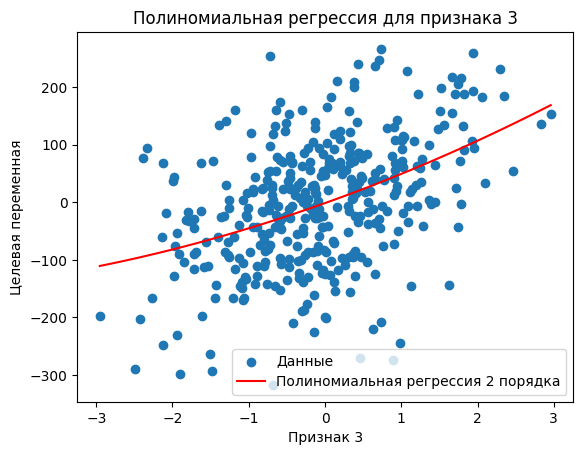

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 2 порядка: 0.19000787278473819


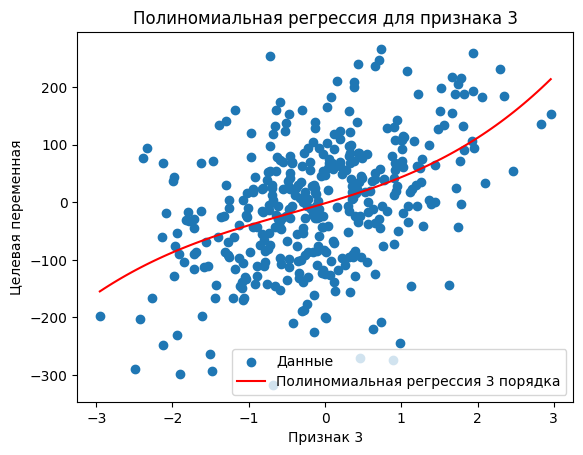

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 3 порядка: 0.19280163734543843


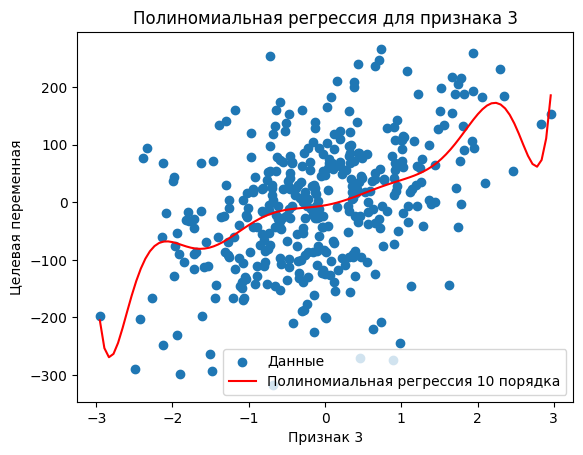

Коэффициент детерминации (R^2) для признака 3 и полиномиальной регрессии 10 порядка: 0.20440944561264418


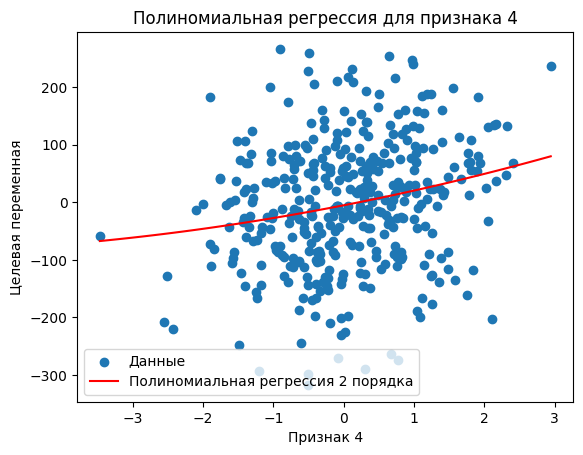

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 2 порядка: 0.04794250960519941


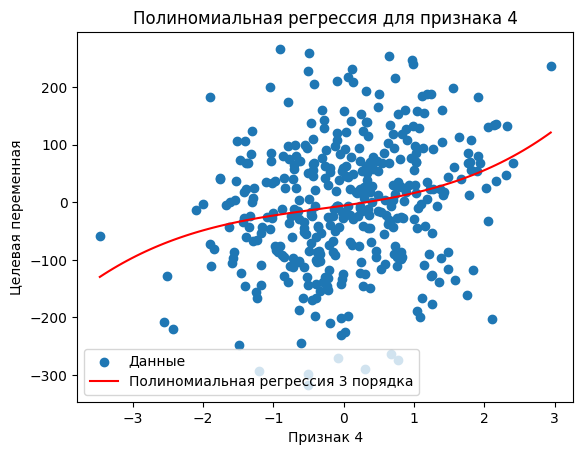

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 3 порядка: 0.05031163217811918


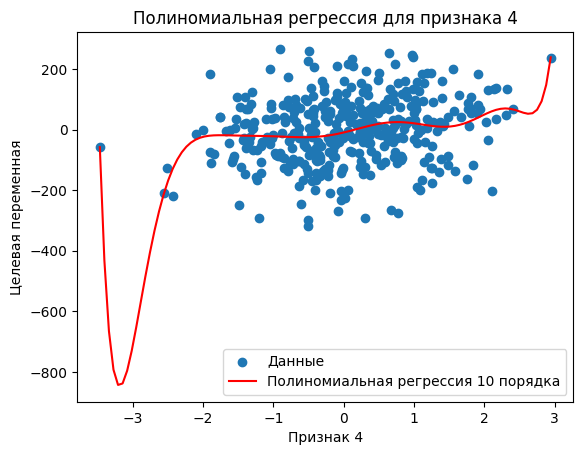

Коэффициент детерминации (R^2) для признака 4 и полиномиальной регрессии 10 порядка: 0.07266746559268988


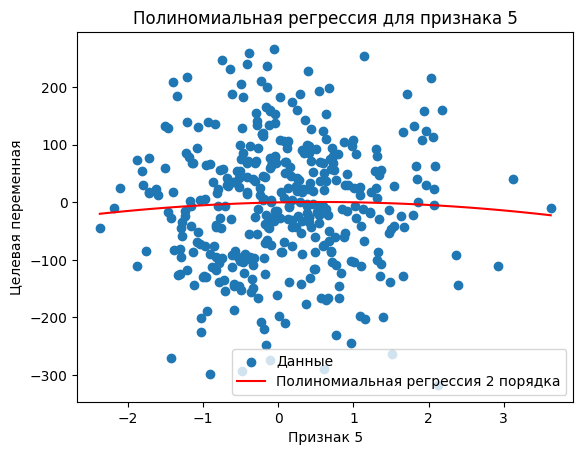

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 2 порядка: 0.0010490365524417067


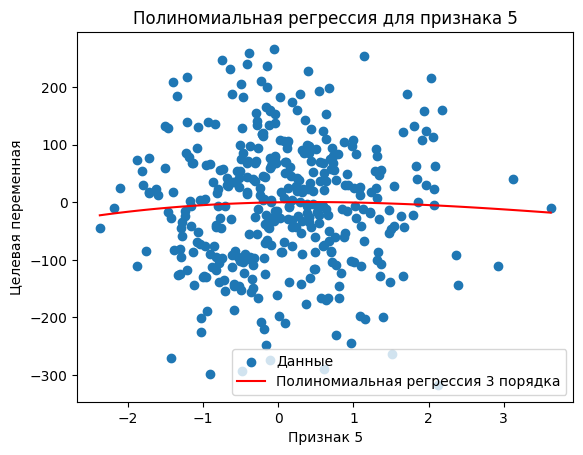

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 3 порядка: 0.0010646025332345932


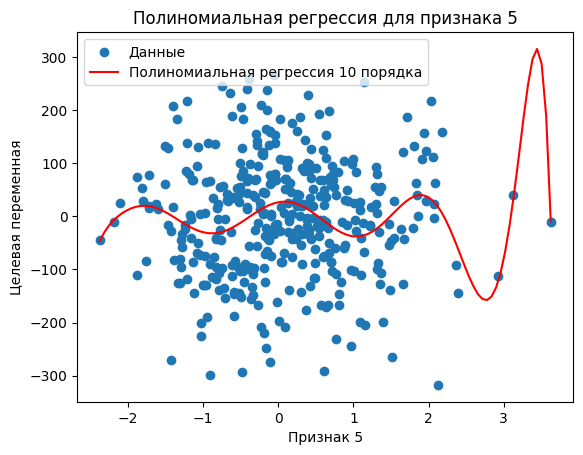

Коэффициент детерминации (R^2) для признака 5 и полиномиальной регрессии 10 порядка: 0.0450526417134679


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


degrees = [2, 3, 10]
for i in range(x.shape[1]):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x[[i]], y)

        plt.scatter(x[i], y, color='#1f77b4', label='Данные')
        xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
        plt.plot(xx, model.predict(xx), color='red', label=f'Полиномиальная регрессия {degree} порядка')
        plt.title(f'Полиномиальная регрессия для признака {i+1}')
        plt.xlabel(f'Признак {i+1}')
        plt.ylabel('Целевая переменная')
        plt.legend()
        plt.show()

        r2 = model.score(x[[i]], y)
        print(f"Коэффициент детерминации (R^2) для признака {i+1} и полиномиальной регрессии {degree} порядка: {r2}")

Чем ближе R² к 1, тем лучше модель. Однако увеличение порядка полинома может привести к переобучению модели.

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [12]:
results = []

for i in range(x.shape[1]):
    model = LinearRegression()
    model.fit(x[[i]], y)
    r2 = model.score(x[[i]], y)
    results.append(('Парная регрессия', f'Признак {i+1}', r2))

multiple_model = LinearRegression()
multiple_model.fit(x, y)
r2 = multiple_model.score(x, y)
results.append(('Множественная регрессия', 'Все признаки', r2))

for i in range(x.shape[1]):
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x[[i]], y)
        r2 = model.score(x[[i]], y)
        results.append((f'Полиномиальная регрессия {degree} порядка', f'Признак {i+1}', r2))

results = pd.DataFrame(results, columns=['Тип модели', 'Признак', 'R^2'])

results

,Тип модели,Признак,R^2
0,Парная регрессия,Признак 1,0.043643
1,Парная регрессия,Признак 2,0.769974
2,Парная регрессия,Признак 3,0.187945
3,Парная регрессия,Признак 4,0.047470
4,Парная регрессия,Признак 5,0.000172
5,Множественная регрессия,Все признаки,0.992220
6,Полиномиальная регрессия 2 порядка,Признак 1,0.043672
7,Полиномиальная регрессия 3 порядка,Признак 1,0.043765
8,Полиномиальная регрессия 10 порядка,Признак 1,0.050356
9,Полиномиальная регрессия 2 порядка,Признак 2,0.769994


Аттрибут 0 (Порядок 2, R² = 0.051623): Низкое значение R² говорит о том, что модель с порядком 2 недостаточно хорошо соответствует данным. Это может быть признаком недообучения.

Аттрибут 0 (Порядок 3, R² = 0.051229): Также низкое значение R², что подтверждает недостаточную пригодность модели для данных.

Аттрибут 0 (Порядок 10, R² = 0.021485): Еще более низкое значение R², что указывает на недообучение. Более высокий порядок полинома может привести к переобучению.

Аттрибут 1 (Порядок 2, R² = 0.847859): Высокое значение R², что говорит о хорошей соответствии модели данным. Вероятно, это подходящий порядок полинома.

Аттрибут 1 (Порядок 3, R² = 0.851289): Еще более высокое значение R², что подтверждает хорошую пригодность модели.

Аттрибут 1 (Порядок 10, R² = -19.946667): Очень низкое и даже отрицательное значение R² указывает на переобучение модели. Это может быть результатом слишком высокого порядка полинома.

Аттрибут 2 (Порядок 2, R² = 0.107122): Низкое значение R², что говорит о недостаточной пригодности модели.

Аттрибут 2 (Порядок 3, R² = 0.103903): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 2 (Порядок 10, R² = 0.099079): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 3 (Порядок 2, R² = 0.039983): Низкое значение R², недостаточная пригодность модели.

Аттрибут 3 (Порядок 3, R² = 0.038443): Аналогично, низкое значение R² подтверждает недостаточное соответствие модели данным.

Аттрибут 3 (Порядок 10, R² = 0.005776): Значение R² остается низким, что указывает на недостаточную пригодность.

Аттрибут 4 (Порядок 2, R² = -0.002723): Отрицательное значение R² говорит о том, что модель практически бесполезна для описания данных.

Аттрибут 4 (Порядок 3, R² = -0.007776): Также отрицательное значение R², что подтверждает бесполезность модели.

Аттрибут 4 (Порядок 10, R² = -0.049160): Очень низкое отрицательное значение R² указывает на переобучение модели.

Итак, на основе этих результатов можно сделать вывод, что некоторые модели переобучены (высокий порядок полинома), а некоторые недообучены (низкий порядок полинома). Подбор оптимального порядка полинома важен для достижения баланса между слишком простой и сложной моделью.

### 4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = multiple_model.predict(x)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")

Средняя абсолютная ошибка (MAE): 7.780683675008627
Среднеквадратичная ошибка (MSE): 93.49228960042412
